In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_row', 150)
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import seaborn as sns
import matplotlib.pyplot as plt

from risk_measure import LabelSetting, Core
from Label_combine import data_merged

from Label_combine_stock import data_merged_stock
from risk_measure_stock_data import LabelSetting_stock, Core_stock

%matplotlib inline
import quantstats as qs
# extend pandas functionality with metrics, etc.
qs.extend_pandas()
#이게 코인

### Portfolio performance

In [2]:
def get_pct_and_our_data(coin_time, model):
    
    # coin_time : RTY_4h
    # model : cat

    our_data = data_merged(result_path = "predict_result", coin_time = coin_time, model = model, origin_data = coin_time)
    our_data = pd.concat([our_data["Date"].shift(-1), our_data.iloc[:, 1:]], axis = 1).dropna().reset_index(drop = True)
    
    pct_data = LabelSetting(our_data).__GetPct__()
    
    origin_data = pd.read_csv(f"../prepro/{coin_time}.csv").iloc[:,:5]
    origin_data = origin_data.iloc[-(pct_data.shape[0]):, :].reset_index(drop = True)
    
    return origin_data, pct_data

def return_test_model(origin_data, pct_data, traget):
    target_value = traget
    test = pd.concat([origin_data, pct_data[target_value]], axis = 1)
    test["Date"] =  [test["Date"].values[i][6:] + "/" + test["Date"].values[i][3:5] + "/" + test["Date"].values[i][0:2] for i in range(test.shape[0])]


    test_model = pd.DataFrame(columns = ["Date", "Close"])
    test_model["Date"] = test["Date"] + " " + test["Time"]
    test_model["Close"] = test[target_value]

    test_model["Date"] = pd.DatetimeIndex(test_model["Date"])
    test_model = test_model[test_model["Date"] >= "2021-06-20"].reset_index(drop = True)

    #test_model.iloc[0, 1] = np.nan
    test_model = test_model.set_index("Date")
    return test_model["Close"]


In [3]:
origin, pct = get_pct_and_our_data("BTC_4h", "cat") 

In [4]:
return_test_model(origin, pct, "Target_2.0_Label").reset_index()

,Date,Close
0,2021-06-20 00:00:00,0.000000
1,2021-06-20 04:00:00,0.000000
2,2021-06-20 08:00:00,0.000000
3,2021-06-20 12:00:00,0.000000
4,2021-06-20 16:00:00,0.000000
...,...,...
2597,2022-08-26 08:00:00,-0.004606
2598,2022-08-26 12:00:00,-0.012265
2599,2022-08-26 16:00:00,-0.020000
2600,2022-08-26 20:00:00,0.000000


In [5]:
def return_model(data_id, model_id, target_ratio, target_ratio_benchmark):

    origin, pct = get_pct_and_our_data(data_id, model_id) # cat

    # Define data
    dates = return_test_model(origin, pct, target_ratio).reset_index()["Date"]
    benchmark_returns = return_test_model(origin, pct, target_ratio_benchmark)
    strategy_returns = return_test_model(origin, pct, target_ratio)

    # Calculate rolling cumulative returns
    benchmark_cumulative_returns = (1 + benchmark_returns).cumprod()
    strategy_cumulative_returns = (1 + strategy_returns).cumprod()
    
    return benchmark_cumulative_returns, strategy_cumulative_returns

    

In [6]:
################################## Stock
def get_pct_and_our_data_stock(coin_time, model):

    our_data = data_merged_stock(result_path = "predict_result2", coin_time = coin_time, model = model, origin_data = coin_time)
    our_data = pd.concat([our_data["Date"].shift(-1), our_data.iloc[:, 1:]], axis = 1).dropna().reset_index(drop = True)
    
    pct_data = LabelSetting_stock(our_data).__GetPct__()
    
    origin_data = pd.read_csv(f"../prepro/{coin_time}.csv").iloc[:,:5]
    origin_data = origin_data.iloc[-(pct_data.shape[0]):, :].reset_index(drop = True)
    
    return origin_data, pct_data

def return_test_model_stock(origin_data, pct_data, traget):
    target_value = traget
    test = pd.concat([origin_data, pct_data[target_value]], axis = 1)

    test_model = pd.DataFrame(columns = ["Date", "Close"])
    test_model["Date"] = test["Date"] + " " + test["Time"]
    test_model["Close"] = test[target_value]

    test_model["Date"] = pd.DatetimeIndex(test_model["Date"])
    #test_model = test_model[test_model["Date"] >= "2021-06-20"]

    #test_model.iloc[0, 1] = np.nan
    test_model = test_model.set_index("Date")
    return test_model["Close"]

def return_model_stock(data_id, model_id, target_ratio, target_ratio_benchmark):

    origin, pct = get_pct_and_our_data_stock(data_id, model_id) # cat

    # Define data
    dates = return_test_model_stock(origin, pct, target_ratio).reset_index()["Date"]
    benchmark_returns = return_test_model_stock(origin, pct, target_ratio_benchmark)
    strategy_returns = return_test_model_stock(origin, pct, target_ratio)

    # Calculate rolling cumulative returns
    benchmark_cumulative_returns = (1 + benchmark_returns).cumprod()
    strategy_cumulative_returns = (1 + strategy_returns).cumprod()
    
    return benchmark_cumulative_returns, strategy_cumulative_returns

    

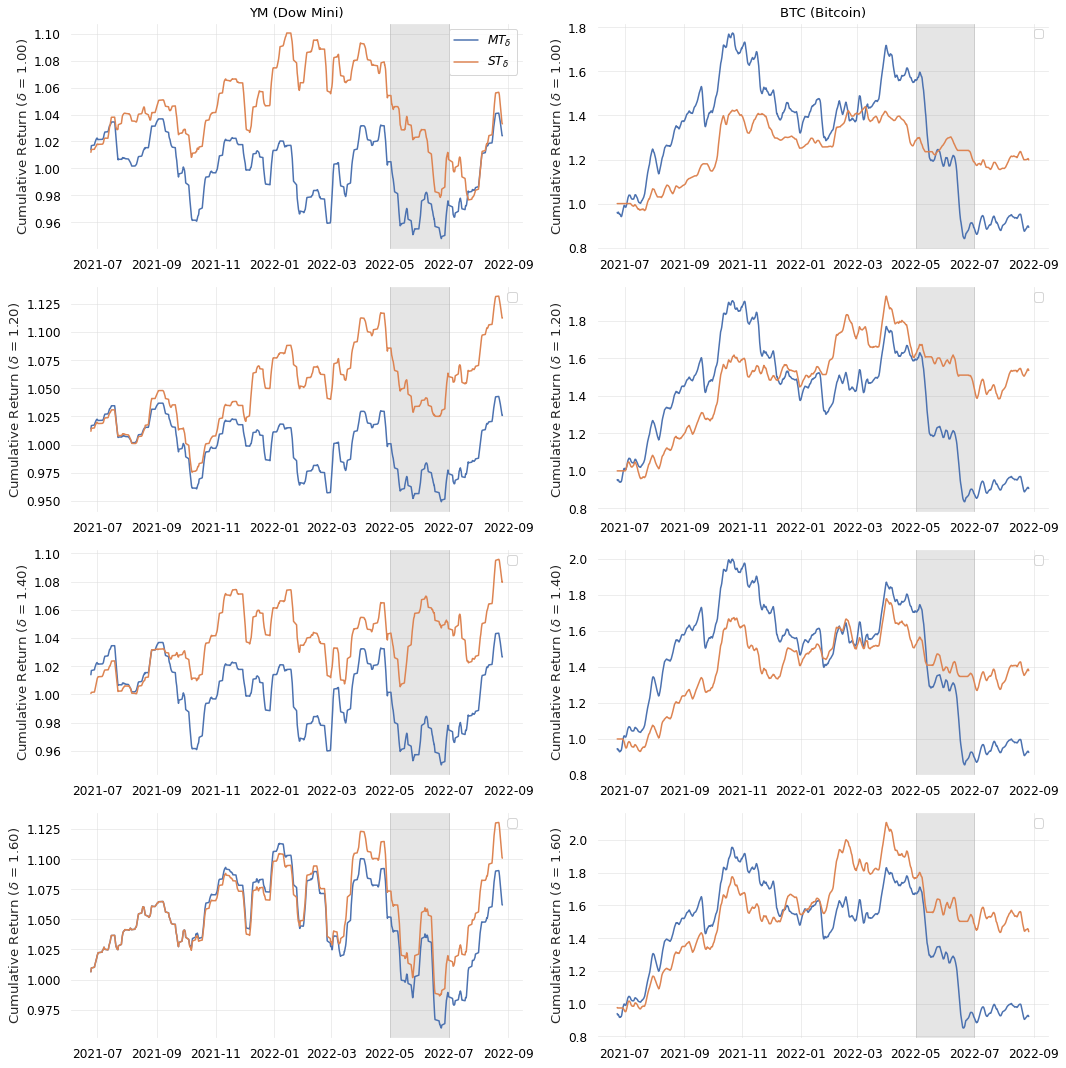

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Plot data and highlight specific x-axis area on each subplot
axs[0, 0].plot(return_model_stock("YM_4h", "knn",  "Target_3.0_Label", "Target_3.0post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[0, 0].plot(return_model_stock("YM_4h", "knn",  "Target_3.0_Label", "Target_3.0post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[0, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[0, 0].legend()
axs[0, 0].set_title('YM (Dow Mini)')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Cumulative Return ($\delta$ = 1.00)')

axs[1, 0].plot(return_model_stock("YM_4h", "knn",  "Target_3.2_Label", "Target_3.2post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[1, 0].plot(return_model_stock("YM_4h", "knn",  "Target_3.2_Label", "Target_3.2post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[1, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[1, 0].legend([])
#axs[1, 0].set_title("YM (Dow Mini): $\delta$ = 1.00")
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Cumulative Return ($\delta$ = 1.20)')

axs[2, 0].plot(return_model_stock("YM_4h", "knn",  "Target_3.4_Label", "Target_3.4post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[2, 0].plot(return_model_stock("YM_4h", "knn",  "Target_3.4_Label", "Target_3.4post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[2, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[2, 0].legend([])
#axs[2, 0].set_title("YM (Dow Mini): $\delta$ = 1.20")
axs[2, 0].set_xlabel('')
axs[2, 0].set_ylabel('Cumulative Return ($\delta$ = 1.40)')


axs[3, 0].plot(return_model_stock("YM_4h", "cat",  "Target_3.6_Label", "Target_3.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[3, 0].plot(return_model_stock("YM_4h", "cat",  "Target_3.6_Label", "Target_3.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[3, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[3, 0].legend([])
#axs[3, 0].set_title("YM (Dow Mini): $\delta$ = 1.40")
axs[3, 0].set_xlabel('')
axs[3, 0].set_ylabel('Cumulative Return ($\delta$ = 1.60)')


# Plot data and highlight specific x-axis area on each subplot
axs[0, 1].plot(return_model("BTC_4h", "cat", "Target_2.0_Label", "Target_2.0post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[0, 1].plot(return_model("BTC_4h", "cat", "Target_2.0_Label", "Target_2.0post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[0, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[0, 1].legend([])
axs[0, 1].set_title('BTC (Bitcoin)')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Cumulative Return ($\delta$ = 1.00)')

axs[1, 1].plot(return_model("BTC_4h", "cat", "Target_2.2_Label", "Target_2.2post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[1, 1].plot(return_model("BTC_4h", "cat", "Target_2.2_Label", "Target_2.2post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[1, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[1, 1].legend([])
#axs[1, 1].set_title("BTC (Bitcoin): $\delta$ = 1.20")
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Cumulative Return ($\delta$ = 1.20)')

axs[2, 1].plot(return_model("BTC_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[2, 1].plot(return_model("BTC_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[2, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[2, 1].legend([])
#axs[2, 1].set_title("BTC (Bitcoin): $\delta$ = 1.40")
axs[2, 1].set_xlabel('')
axs[2, 1].set_ylabel('Cumulative Return ($\delta$ = 1.40)')

axs[3, 1].plot(return_model("BTC_4h", "cat", "Target_2.6_Label", "Target_2.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[3, 1].plot(return_model("BTC_4h", "cat", "Target_2.6_Label", "Target_2.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[3, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[3, 1].legend([])
#axs[3, 1].set_title("BTC (Bitcoin): $\delta$ = 1.60")
axs[3, 1].set_xlabel('')
axs[3, 1].set_ylabel('Cumulative Return ($\delta$ = 1.60)')

plt.tight_layout()
plt.savefig("BTC_YM.png")

### All data

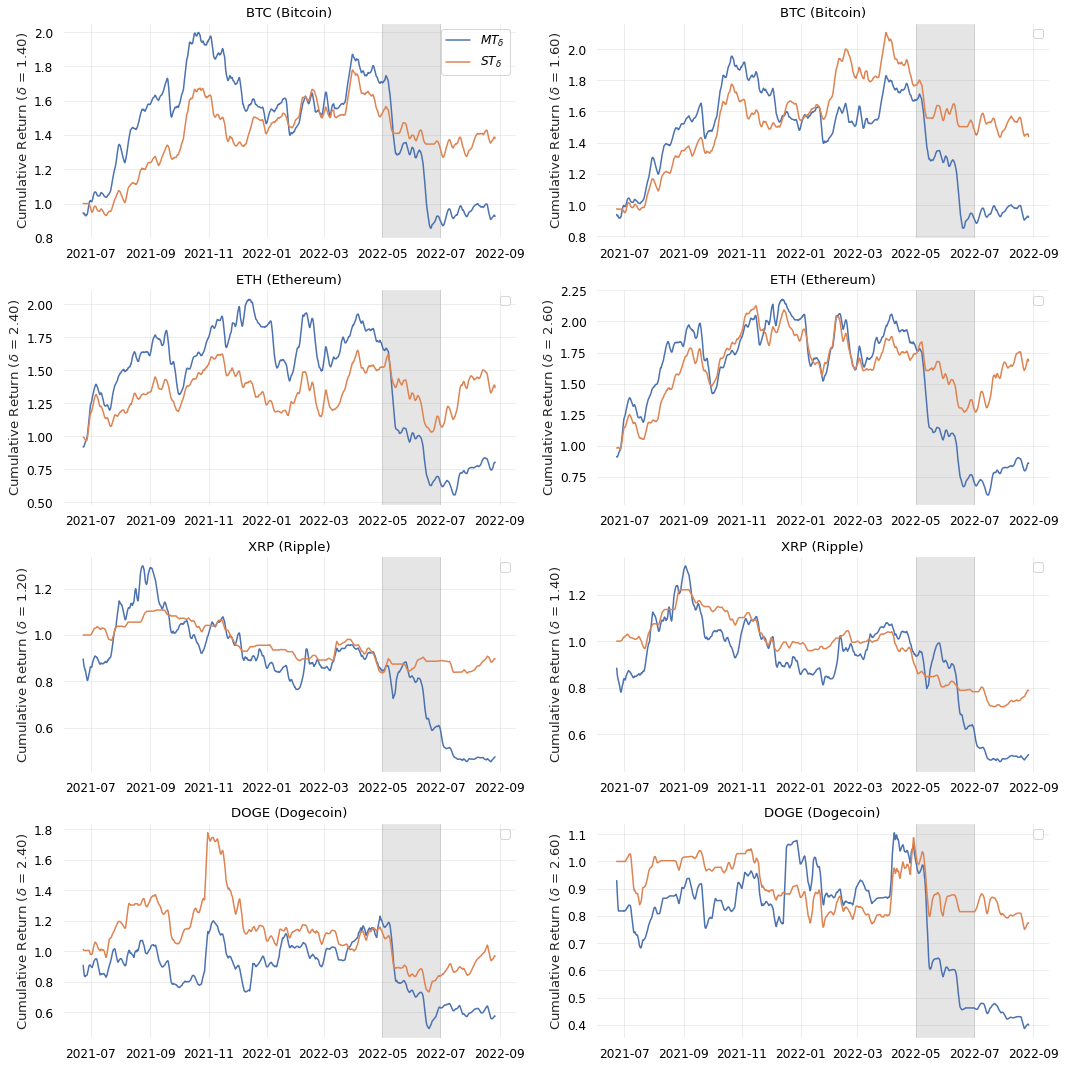

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

axs[0, 0].plot(return_model("BTC_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[0, 0].plot(return_model("BTC_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[0, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[0, 0].set_title('BTC (Bitcoin)')
axs[0, 0].legend()
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Cumulative Return ($\delta$ = 1.40)')

axs[0, 1].plot(return_model("BTC_4h", "cat", "Target_2.6_Label", "Target_2.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[0, 1].plot(return_model("BTC_4h", "cat", "Target_2.6_Label", "Target_2.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[0, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[0, 1].legend([])
axs[0, 1].set_title('BTC (Bitcoin)')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Cumulative Return ($\delta$ = 1.60)')


axs[1, 0].plot(return_model("ETH_4h", "cat", "Target_3.4_Label", "Target_3.4post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[1, 0].plot(return_model("ETH_4h", "cat", "Target_3.4_Label", "Target_3.4post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[1, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[1, 0].legend([])
axs[1, 0].set_title('ETH (Ethereum)')
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Cumulative Return ($\delta$ = 2.40)')

axs[1, 1].plot(return_model("ETH_4h", "cat", "Target_3.6_Label", "Target_3.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[1, 1].plot(return_model("ETH_4h", "cat", "Target_3.6_Label", "Target_3.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[1, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[1, 1].legend([])
axs[1, 1].set_title('ETH (Ethereum)')
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Cumulative Return ($\delta$ = 2.60)')


axs[2, 0].plot(return_model("XRP_4h", "cat", "Target_2.2_Label", "Target_2.2post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[2, 0].plot(return_model("XRP_4h", "cat", "Target_2.2_Label", "Target_2.2post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[2, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[2, 0].legend([])
axs[2, 0].set_title('XRP (Ripple)')

axs[2, 0].set_xlabel('')
axs[2, 0].set_ylabel('Cumulative Return ($\delta$ = 1.20)')

axs[2, 1].plot(return_model("XRP_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[2, 1].plot(return_model("XRP_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[2, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[2, 1].legend([])
axs[2, 1].set_title('XRP (Ripple)')
axs[2, 1].set_xlabel('')
axs[2, 1].set_ylabel('Cumulative Return ($\delta$ = 1.40)')


axs[3, 0].plot(return_model("DOGE_4h", "cat", "Target_3.4_Label", "Target_3.4post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[3, 0].plot(return_model("DOGE_4h", "cat", "Target_3.4_Label", "Target_3.4post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[3, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[3, 0].legend([])
axs[3, 0].set_title('DOGE (Dogecoin)')

axs[3, 0].set_xlabel('')
axs[3, 0].set_ylabel('Cumulative Return ($\delta$ = 2.40)')

axs[3, 1].plot(return_model("DOGE_4h", "mlp", "Target_3.6_Label", "Target_3.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[3, 1].plot(return_model("DOGE_4h", "mlp", "Target_3.6_Label", "Target_3.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[3, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[3, 1].legend([])
axs[3, 1].set_title('DOGE (Dogecoin)')

axs[3, 1].set_xlabel('')
axs[3, 1].set_ylabel('Cumulative Return ($\delta$ = 2.60)')


plt.tight_layout()
plt.savefig("BTC_YM.png")

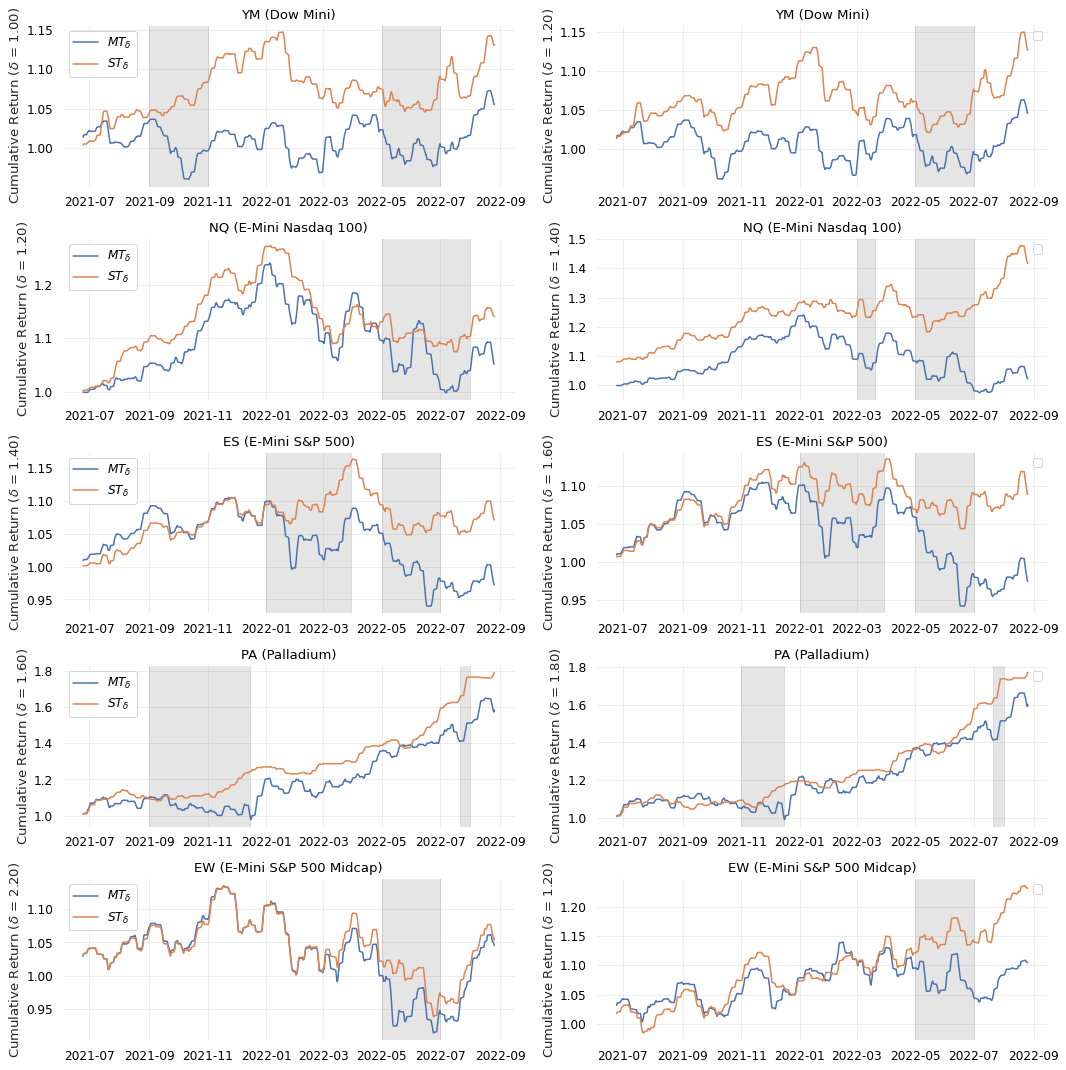

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot data and highlight specific x-axis area on each subplot
axs[0, 0].plot(return_model_stock("YM_4h", "knn",  "Target_2.2_Label", "Target_2.2post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[0, 0].plot(return_model_stock("YM_4h", "knn",  "Target_2.2_Label", "Target_2.2post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[0, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[0, 0].axvspan('2021-09-01 00:00:00', '2021-11-01 00:00:00', alpha=0.2, color='gray')
axs[0, 0].legend()
axs[0, 0].set_title('YM (Dow Mini)')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Cumulative Return ($\delta$ = 1.00)')

axs[0, 1].plot(return_model_stock("YM_4h", "knn",  "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[0, 1].plot(return_model_stock("YM_4h", "knn",  "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[0, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[0, 1].legend([])
axs[0, 1].set_title('YM (Dow Mini)')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Cumulative Return ($\delta$ = 1.20)')

# Plot data and highlight specific x-axis area on each subplot
axs[1, 0].plot(return_model_stock("NQ_4h", "knn",  "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[1, 0].plot(return_model_stock("NQ_4h", "knn",  "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[1, 0].axvspan('2022-05-01 00:00:00', '2022-08-01 00:00:00', alpha=0.2, color='gray')
axs[1, 0].legend()
axs[1, 0].set_title('NQ (E-Mini Nasdaq 100)')
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Cumulative Return ($\delta$ = 1.20)')

axs[1, 1].plot(return_model_stock("NQ_4h", "knn",  "Target_2.6_Label", "Target_2.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[1, 1].plot(return_model_stock("NQ_4h", "knn",  "Target_2.6_Label", "Target_2.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[1, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[1, 1].axvspan('2022-03-01 00:00:00', '2022-03-20 00:00:00', alpha=0.2, color='gray')

axs[1, 1].legend([])
axs[1, 1].set_title('NQ (E-Mini Nasdaq 100)')
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Cumulative Return ($\delta$ = 1.40)')


# Plot data and highlight specific x-axis area on each subplot
axs[2, 0].plot(return_model_stock("ES_4h", "knn",  "Target_2.6_Label", "Target_2.6post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[2, 0].plot(return_model_stock("ES_4h", "knn",  "Target_2.6_Label", "Target_2.6post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[2, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[2, 0].axvspan('2022-01-01 00:00:00', '2022-03-30 00:00:00', alpha=0.2, color='gray')

axs[2, 0].legend()
axs[2, 0].set_title('ES (E-Mini S&P 500)')
axs[2, 0].set_xlabel('')
axs[2, 0].set_ylabel('Cumulative Return ($\delta$ = 1.40)')

axs[2, 1].plot(return_model_stock("ES_4h", "knn",  "Target_2.8_Label", "Target_2.8post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[2, 1].plot(return_model_stock("ES_4h", "knn",  "Target_2.8_Label", "Target_2.8post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[2, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2022-01-01 00:00:00', '2022-03-30 00:00:00', alpha=0.2, color='gray')

axs[2, 1].legend([])
axs[2, 1].set_title('ES (E-Mini S&P 500)')
axs[2, 1].set_xlabel('')
axs[2, 1].set_ylabel('Cumulative Return ($\delta$ = 1.60)')



# Plot data and highlight specific x-axis area on each subplot
axs[3, 0].plot(return_model_stock("PA_4h", "mlp",  "Target_2.8_Label", "Target_2.8post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[3, 0].plot(return_model_stock("PA_4h", "mlp",  "Target_2.8_Label", "Target_2.8post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[3, 0].axvspan('2022-07-21 00:00:00', '2022-08-01 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-09-01 00:00:00', '2021-12-15 00:00:00', alpha=0.2, color='gray')

axs[3, 0].legend()
axs[3, 0].set_title('PA (Palladium)')
axs[3, 0].set_xlabel('')
axs[3, 0].set_ylabel('Cumulative Return ($\delta$ = 1.60)')

axs[3, 1].plot(return_model_stock("PA_4h", "mlp",  "Target_3.0_Label", "Target_3.0post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[3, 1].plot(return_model_stock("PA_4h", "mlp",  "Target_3.0_Label", "Target_3.0post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[3, 1].axvspan('2022-07-21 00:00:00', '2022-08-01 00:00:00', alpha=0.2, color='gray')
axs[3, 1].axvspan('2021-11-01 00:00:00', '2021-12-15 00:00:00', alpha=0.2, color='gray')

axs[3, 1].legend([])
axs[3, 1].set_title('PA (Palladium)')
axs[3, 1].set_xlabel('')
axs[3, 1].set_ylabel('Cumulative Return ($\delta$ = 1.80)')


# Plot data and highlight specific x-axis area on each subplot
axs[4, 0].plot(return_model_stock("EW_4h", "mlp",  "Target_3.4_Label", "Target_3.4post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[4, 0].plot(return_model_stock("EW_4h", "mlp",  "Target_3.4_Label", "Target_3.4post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[4, 0].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[4, 0].legend()
axs[4, 0].set_title('EW (E-Mini S&P 500 Midcap)')
axs[4, 0].set_xlabel('')
axs[4, 0].set_ylabel('Cumulative Return ($\delta$ = 2.20)')

axs[4, 1].plot(return_model_stock("EW_4h", "rf",  "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[4, 1].plot(return_model_stock("EW_4h", "rf",  "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[4, 1].axvspan('2022-05-01 00:00:00', '2022-07-01 00:00:00', alpha=0.2, color='gray')
axs[4, 1].legend([])
axs[4, 1].set_title('EW (E-Mini S&P 500 Midcap)')
axs[4, 1].set_xlabel('')
axs[4, 1].set_ylabel('Cumulative Return ($\delta$ = 1.20)')

plt.tight_layout()
plt.savefig("BTC_YM.png")

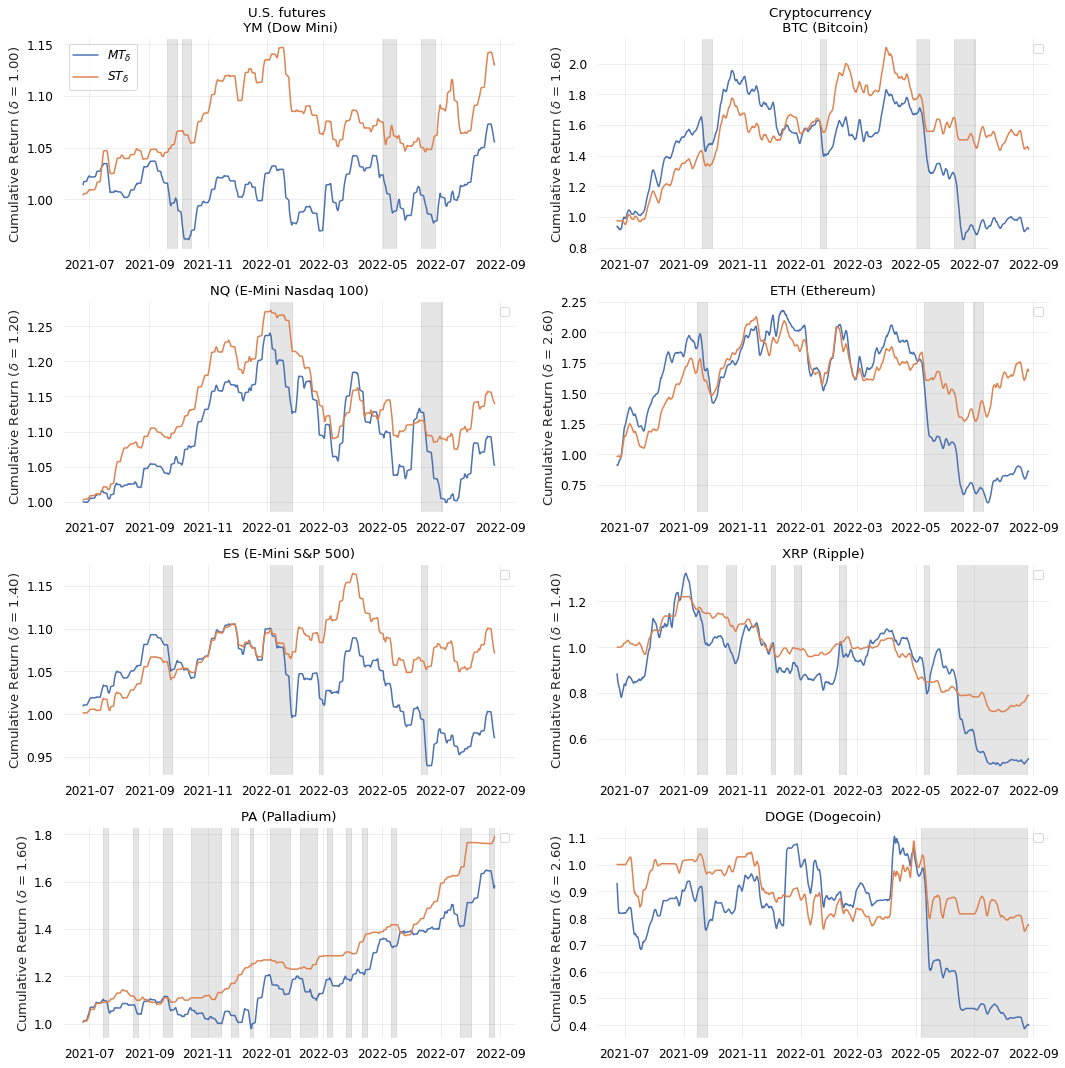

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Plot data and highlight specific x-axis area on each subplot
axs[0, 0].plot(return_model_stock("YM_4h", "knn",  "Target_2.2_Label", "Target_2.2post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[0, 0].plot(return_model_stock("YM_4h", "knn",  "Target_2.2_Label", "Target_2.2post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[0, 0].axvspan('2021-09-20 00:00:00', '2021-09-30 00:00:00', alpha=0.2, color='gray')
axs[0, 0].axvspan('2021-10-05 00:00:00', '2021-10-15 00:00:00', alpha=0.2, color='gray')
axs[0, 0].axvspan('2022-05-02 00:00:00', '2022-05-15 00:00:00', alpha=0.2, color='gray')
axs[0, 0].axvspan('2022-06-10 00:00:00', '2022-06-25 00:00:00', alpha=0.2, color='gray')
axs[0, 0].legend()
axs[0, 0].set_title('U.S. futures \n YM (Dow Mini)', fontname='Times New Roman')
axs[0, 0].set_xlabel('', fontname='Times New Roman')
axs[0, 0].set_ylabel('Cumulative Return ($\delta$ = 1.00)', fontname='Times New Roman')

axs[0, 1].plot(return_model("BTC_4h", "cat", "Target_2.6_Label", "Target_2.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[0, 1].plot(return_model("BTC_4h", "cat", "Target_2.6_Label", "Target_2.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[0, 1].axvspan('2021-09-20 00:00:00', '2021-09-30 00:00:00', alpha=0.2, color='gray')
axs[0, 1].axvspan('2022-01-21 00:00:00', '2022-01-27 00:00:00', alpha=0.2, color='gray')
axs[0, 1].axvspan('2022-05-02 00:00:00', '2022-05-15 00:00:00', alpha=0.2, color='gray')
axs[0, 1].axvspan('2022-06-10 00:00:00', '2022-07-02 00:00:00', alpha=0.2, color='gray')
axs[0, 1].legend([])
axs[0, 1].set_title('Cryptocurrency \n BTC (Bitcoin)', fontname='Times New Roman')
axs[0, 1].set_xlabel('', fontname='Times New Roman')
axs[0, 1].set_ylabel('Cumulative Return ($\delta$ = 1.60)', fontname='Times New Roman')



# Plot data and highlight specific x-axis area on each subplot
axs[1, 0].plot(return_model_stock("NQ_4h", "knn",  "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[1, 0].plot(return_model_stock("NQ_4h", "knn",  "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[1, 0].axvspan('2022-01-05 00:00:00', '2022-01-27 00:00:00', alpha=0.2, color='gray')
axs[1, 0].axvspan('2022-06-10 00:00:00', '2022-07-02 00:00:00', alpha=0.2, color='gray')
axs[1, 0].legend([])
axs[1, 0].set_title('NQ (E-Mini Nasdaq 100)', fontname='Times New Roman')
axs[1, 0].set_xlabel('', fontname='Times New Roman')
axs[1, 0].set_ylabel('Cumulative Return ($\delta$ = 1.20)', fontname='Times New Roman')

axs[1, 1].plot(return_model("ETH_4h", "cat", "Target_3.6_Label", "Target_3.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[1, 1].plot(return_model("ETH_4h", "cat", "Target_3.6_Label", "Target_3.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[1, 1].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[1, 1].axvspan('2022-05-10 00:00:00', '2022-06-20 00:00:00', alpha=0.2, color='gray')
axs[1, 1].axvspan('2022-06-30 00:00:00', '2022-07-10 00:00:00', alpha=0.2, color='gray')
axs[1, 1].legend([])
axs[1, 1].set_title('ETH (Ethereum)', fontname='Times New Roman')
axs[1, 1].set_xlabel('', fontname='Times New Roman')
axs[1, 1].set_ylabel('Cumulative Return ($\delta$ = 2.60)', fontname='Times New Roman')


# Plot data and highlight specific x-axis area on each subplot
axs[2, 0].plot(return_model_stock("ES_4h", "knn",  "Target_2.6_Label", "Target_2.6post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[2, 0].plot(return_model_stock("ES_4h", "knn",  "Target_2.6_Label", "Target_2.6post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[2, 0].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[2, 0].axvspan('2022-01-05 00:00:00', '2022-01-27 00:00:00', alpha=0.2, color='gray')
axs[2, 0].axvspan('2022-02-24 00:00:00', '2022-02-28 00:00:00', alpha=0.2, color='gray')
axs[2, 0].axvspan('2022-06-10 00:00:00', '2022-06-17 00:00:00', alpha=0.2, color='gray')
axs[2, 0].legend([])
axs[2, 0].set_title('ES (E-Mini S&P 500)', fontname='Times New Roman')
axs[2, 0].set_xlabel('', fontname='Times New Roman')
axs[2, 0].set_ylabel('Cumulative Return ($\delta$ = 1.40)', fontname='Times New Roman')

axs[2, 1].plot(return_model("XRP_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[2, 1].plot(return_model("XRP_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[2, 1].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2021-10-15 00:00:00', '2021-10-25 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2021-12-01 00:00:00', '2021-12-05 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2021-12-25 00:00:00', '2022-01-01 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2022-02-10 00:00:00', '2022-02-17 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2022-05-10 00:00:00', '2022-05-15 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2022-06-13 00:00:00', '2022-08-25 00:00:00', alpha=0.2, color='gray')

axs[2, 1].legend([])
axs[2, 1].set_title('XRP (Ripple)', fontname='Times New Roman')
axs[2, 1].set_xlabel('', fontname='Times New Roman')
axs[2, 1].set_ylabel('Cumulative Return ($\delta$ = 1.40)', fontname='Times New Roman')

# Plot data and highlight specific x-axis area on each subplot
axs[3, 0].plot(return_model_stock("PA_4h", "mlp",  "Target_2.8_Label", "Target_2.8post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[3, 0].plot(return_model_stock("PA_4h", "mlp",  "Target_2.8_Label", "Target_2.8post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[3, 0].axvspan('2022-07-21 00:00:00', '2022-08-01 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-07-15 00:00:00', '2021-07-20 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-08-15 00:00:00', '2021-08-20 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-10-15 00:00:00', '2021-11-15 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-11-25 00:00:00', '2021-12-02 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-12-15 00:00:00', '2021-12-18 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-01-05 00:00:00', '2022-01-25 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-02-05 00:00:00', '2022-02-22 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-03-05 00:00:00', '2022-03-10 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-03-25 00:00:00', '2022-03-30 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-04-10 00:00:00', '2022-04-15 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-05-10 00:00:00', '2022-05-15 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-08-20 00:00:00', '2022-08-25 00:00:00', alpha=0.2, color='gray')
axs[3, 0].legend([])
axs[3, 0].set_title('PA (Palladium)', fontname='Times New Roman')
axs[3, 0].set_xlabel('', fontname='Times New Roman')
axs[3, 0].set_ylabel('Cumulative Return ($\delta$ = 1.60)', fontname='Times New Roman')

axs[3, 1].plot(return_model("DOGE_4h", "mlp", "Target_3.6_Label", "Target_3.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[3, 1].plot(return_model("DOGE_4h", "mlp", "Target_3.6_Label", "Target_3.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[3, 1].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[3, 1].axvspan('2022-05-07 00:00:00', '2022-08-25 00:00:00', alpha=0.2, color='gray')
axs[3, 1].legend([])
axs[3, 1].set_title('DOGE (Dogecoin)', fontname='Times New Roman')
axs[3, 1].set_xlabel('', fontname='Times New Roman')
axs[3, 1].set_ylabel('Cumulative Return ($\delta$ = 2.60)', fontname='Times New Roman')


plt.tight_layout()
plt.savefig("Showcase.pdf")
#plt.savefig("BTC_YM.png")

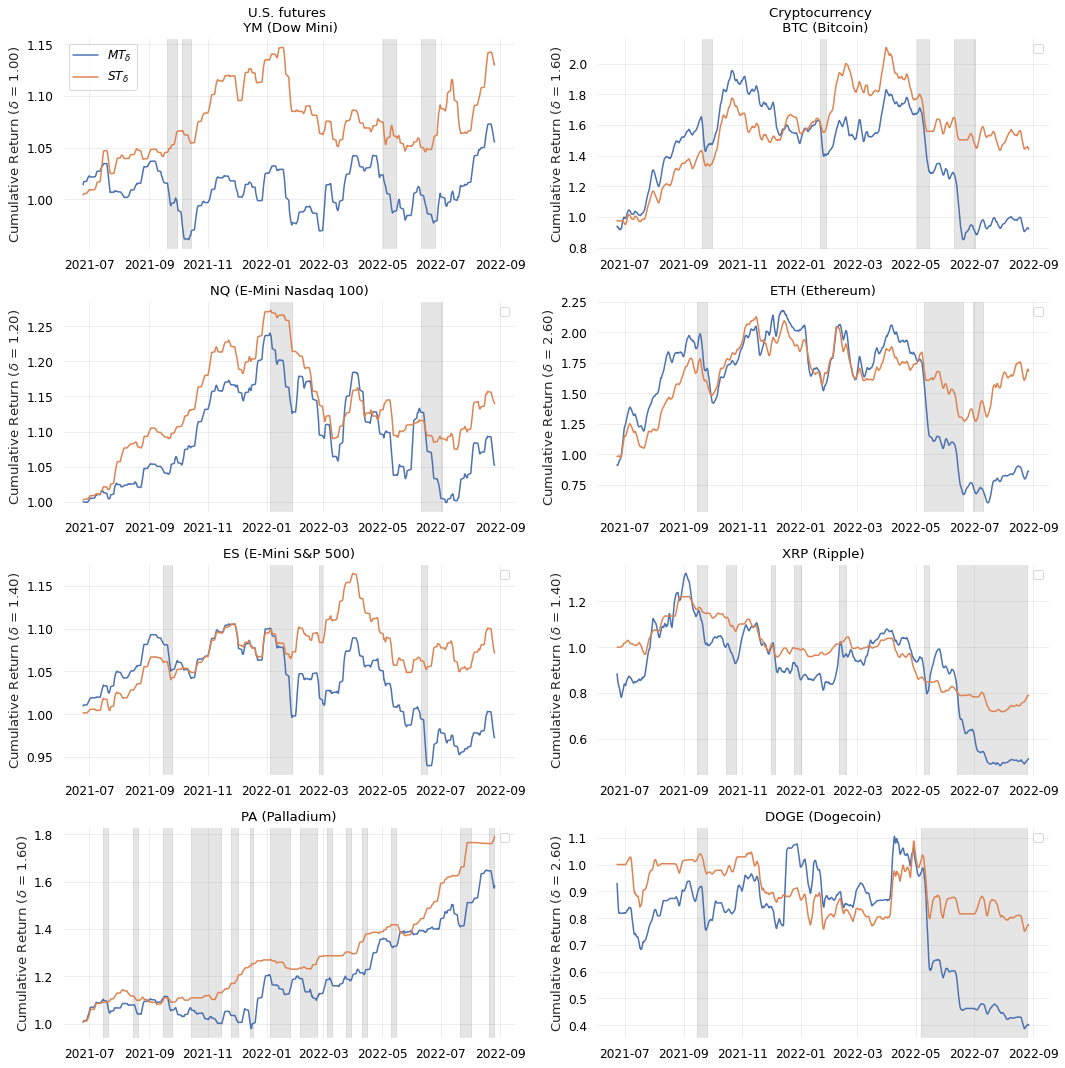

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['font.size'] = 12

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Plot data and highlight specific x-axis area on each subplot
axs[0, 0].plot(return_model_stock("YM_4h", "knn",  "Target_2.2_Label", "Target_2.2post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[0, 0].plot(return_model_stock("YM_4h", "knn",  "Target_2.2_Label", "Target_2.2post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[0, 0].axvspan('2021-09-20 00:00:00', '2021-09-30 00:00:00', alpha=0.2, color='gray')
axs[0, 0].axvspan('2021-10-05 00:00:00', '2021-10-15 00:00:00', alpha=0.2, color='gray')
axs[0, 0].axvspan('2022-05-02 00:00:00', '2022-05-15 00:00:00', alpha=0.2, color='gray')
axs[0, 0].axvspan('2022-06-10 00:00:00', '2022-06-25 00:00:00', alpha=0.2, color='gray')
axs[0, 0].legend()
axs[0, 0].set_title('U.S. futures \n YM (Dow Mini)', fontname='Times New Roman')
axs[0, 0].set_xlabel('', fontname='Times New Roman')
axs[0, 0].set_ylabel('Cumulative Return ($\delta$ = 1.00)', fontname='Times New Roman')

axs[0, 1].plot(return_model("BTC_4h", "cat", "Target_2.6_Label", "Target_2.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[0, 1].plot(return_model("BTC_4h", "cat", "Target_2.6_Label", "Target_2.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[0, 1].axvspan('2021-09-20 00:00:00', '2021-09-30 00:00:00', alpha=0.2, color='gray')
axs[0, 1].axvspan('2022-01-21 00:00:00', '2022-01-27 00:00:00', alpha=0.2, color='gray')
axs[0, 1].axvspan('2022-05-02 00:00:00', '2022-05-15 00:00:00', alpha=0.2, color='gray')
axs[0, 1].axvspan('2022-06-10 00:00:00', '2022-07-02 00:00:00', alpha=0.2, color='gray')
axs[0, 1].legend([])
axs[0, 1].set_title('Cryptocurrency \n BTC (Bitcoin)', fontname='Times New Roman')
axs[0, 1].set_xlabel('', fontname='Times New Roman')
axs[0, 1].set_ylabel('Cumulative Return ($\delta$ = 1.60)', fontname='Times New Roman')



# Plot data and highlight specific x-axis area on each subplot
axs[1, 0].plot(return_model_stock("NQ_4h", "knn",  "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[1, 0].plot(return_model_stock("NQ_4h", "knn",  "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[1, 0].axvspan('2022-01-05 00:00:00', '2022-01-27 00:00:00', alpha=0.2, color='gray')
axs[1, 0].axvspan('2022-06-10 00:00:00', '2022-07-02 00:00:00', alpha=0.2, color='gray')
axs[1, 0].legend([])
axs[1, 0].set_title('NQ (E-Mini Nasdaq 100)', fontname='Times New Roman')
axs[1, 0].set_xlabel('', fontname='Times New Roman')
axs[1, 0].set_ylabel('Cumulative Return ($\delta$ = 1.20)', fontname='Times New Roman')

axs[1, 1].plot(return_model("ETH_4h", "cat", "Target_3.6_Label", "Target_3.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[1, 1].plot(return_model("ETH_4h", "cat", "Target_3.6_Label", "Target_3.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[1, 1].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[1, 1].axvspan('2022-05-10 00:00:00', '2022-06-20 00:00:00', alpha=0.2, color='gray')
axs[1, 1].axvspan('2022-06-30 00:00:00', '2022-07-10 00:00:00', alpha=0.2, color='gray')
axs[1, 1].legend([])
axs[1, 1].set_title('ETH (Ethereum)', fontname='Times New Roman')
axs[1, 1].set_xlabel('', fontname='Times New Roman')
axs[1, 1].set_ylabel('Cumulative Return ($\delta$ = 2.60)', fontname='Times New Roman')


# Plot data and highlight specific x-axis area on each subplot
axs[2, 0].plot(return_model_stock("ES_4h", "knn",  "Target_2.6_Label", "Target_2.6post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[2, 0].plot(return_model_stock("ES_4h", "knn",  "Target_2.6_Label", "Target_2.6post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[2, 0].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[2, 0].axvspan('2022-01-05 00:00:00', '2022-01-27 00:00:00', alpha=0.2, color='gray')
axs[2, 0].axvspan('2022-02-24 00:00:00', '2022-02-28 00:00:00', alpha=0.2, color='gray')
axs[2, 0].axvspan('2022-06-10 00:00:00', '2022-06-17 00:00:00', alpha=0.2, color='gray')
axs[2, 0].legend([])
axs[2, 0].set_title('ES (E-Mini S&P 500)', fontname='Times New Roman')
axs[2, 0].set_xlabel('', fontname='Times New Roman')
axs[2, 0].set_ylabel('Cumulative Return ($\delta$ = 1.40)', fontname='Times New Roman')

axs[2, 1].plot(return_model("XRP_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[2, 1].plot(return_model("XRP_4h", "cat", "Target_2.4_Label", "Target_2.4post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[2, 1].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2021-10-15 00:00:00', '2021-10-25 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2021-12-01 00:00:00', '2021-12-05 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2021-12-25 00:00:00', '2022-01-01 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2022-02-10 00:00:00', '2022-02-17 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2022-05-10 00:00:00', '2022-05-15 00:00:00', alpha=0.2, color='gray')
axs[2, 1].axvspan('2022-06-13 00:00:00', '2022-08-25 00:00:00', alpha=0.2, color='gray')

axs[2, 1].legend([])
axs[2, 1].set_title('XRP (Ripple)', fontname='Times New Roman')
axs[2, 1].set_xlabel('', fontname='Times New Roman')
axs[2, 1].set_ylabel('Cumulative Return ($\delta$ = 1.40)', fontname='Times New Roman')

# Plot data and highlight specific x-axis area on each subplot
axs[3, 0].plot(return_model_stock("PA_4h", "mlp",  "Target_2.8_Label", "Target_2.8post_Label")[0].rolling(window=20).mean(), label='$MT_\delta$')
axs[3, 0].plot(return_model_stock("PA_4h", "mlp",  "Target_2.8_Label", "Target_2.8post_Label")[1].rolling(window=20).mean(), label='$ST_\delta$')
axs[3, 0].axvspan('2022-07-21 00:00:00', '2022-08-01 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-07-15 00:00:00', '2021-07-20 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-08-15 00:00:00', '2021-08-20 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-10-15 00:00:00', '2021-11-15 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-11-25 00:00:00', '2021-12-02 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2021-12-15 00:00:00', '2021-12-18 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-01-05 00:00:00', '2022-01-25 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-02-05 00:00:00', '2022-02-22 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-03-05 00:00:00', '2022-03-10 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-03-25 00:00:00', '2022-03-30 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-04-10 00:00:00', '2022-04-15 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-05-10 00:00:00', '2022-05-15 00:00:00', alpha=0.2, color='gray')
axs[3, 0].axvspan('2022-08-20 00:00:00', '2022-08-25 00:00:00', alpha=0.2, color='gray')
axs[3, 0].legend([])
axs[3, 0].set_title('PA (Palladium)', fontname='Times New Roman')
axs[3, 0].set_xlabel('', fontname='Times New Roman')
axs[3, 0].set_ylabel('Cumulative Return ($\delta$ = 1.60)', fontname='Times New Roman')

axs[3, 1].plot(return_model("DOGE_4h", "mlp", "Target_3.6_Label", "Target_3.6post_Label")[0].rolling(window=20).mean(), label='Benchmark')
axs[3, 1].plot(return_model("DOGE_4h", "mlp", "Target_3.6_Label", "Target_3.6post_Label")[1].rolling(window=20).mean(), label='Strategy')
axs[3, 1].axvspan('2021-09-15 00:00:00', '2021-09-25 00:00:00', alpha=0.2, color='gray')
axs[3, 1].axvspan('2022-05-07 00:00:00', '2022-08-25 00:00:00', alpha=0.2, color='gray')
axs[3, 1].legend([])
axs[3, 1].set_title('DOGE (Dogecoin)', fontname='Times New Roman')
axs[3, 1].set_xlabel('', fontname='Times New Roman')
axs[3, 1].set_ylabel('Cumulative Return ($\delta$ = 2.60)', fontname='Times New Roman')


plt.tight_layout()
plt.savefig("BTC_YM.png")

### Measurement